k= 20  - steps:  547.4
k= 30  - steps:  492.8
k= 40  - steps:  566.8
k= 50  - steps:  645.4
k= 60  - steps:  559.4
k= 70  - steps:  551.4
k= 80  - steps:  635.0
k= 90  - steps:  571.6
k= 100  - steps:  603.0
k= 110  - steps:  629.8
k= 120  - steps:  718.6
k= 130  - steps:  780.2
k= 140  - steps:  706.2
k= 150  - steps:  656.4
k= 160  - steps:  616.4
k= 170  - steps:  485.6
k= 180  - steps:  661.8
k= 190  - steps:  604.2
k= 200  - steps:  850.6
k= 210  - steps:  636.8
k= 220  - steps:  606.2
k= 230  - steps:  689.0
k= 240  - steps:  621.6
k= 250  - steps:  910.2
k= 260  - steps:  609.6
k= 270  - steps:  690.8
k= 280  - steps:  888.6
k= 290  - steps:  946.0
k= 300  - steps:  975.8
k= 310  - steps:  990.8
k= 320  - steps:  878.6
k= 330  - steps:  1113.0
k= 340  - steps:  863.2
k= 350  - steps:  666.4
k= 360  - steps:  805.8
k= 370  - steps:  991.0
k= 380  - steps:  856.4
k= 390  - steps:  949.6
k= 400  - steps:  884.6
k= 410  - steps:  906.4
k= 420  - steps:  935.4
k= 430  - steps:  920.4

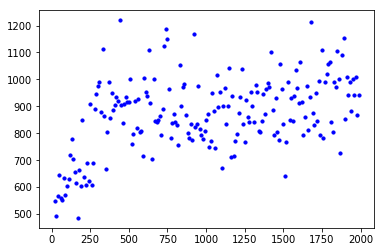

In [1]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import round
import hw_generator


def plot(samples, labels):
    length = len(samples);
    for i in range(0, length, 1):
        c = 'r' if labels[i] < 0 else 'b'
        plt.scatter(samples[i][0], samples[i][1], s=0.05, facecolors=c, edgecolors=c)
        # print('\rpl: %.2f' % (100 * i/length), end='')
        # sys.stdout.write("\033[F")


def shuffle_samples_and_labels(samples, labels):
    rand = np.random.RandomState(1024)
    shuffle = rand.permutation(len(samples))
    samples, labels = samples[shuffle], labels[shuffle]
    return samples, labels


def multiply(a, b):
    return np.sum(np.multiply(a, b))


def perceptron(samples, labels):
    w = (0, 0, 0)  # x, y , b
    steps = 0
    errors = 1
    length = len(samples)
    while errors:
        errors = 0
        for i in range(0, length, 1):
            val = multiply(w, samples[i])
            if np.sign(val) != labels[i]:
                w = np.add(w, np.multiply(samples[i], labels[i]))
                errors = errors + 1
                steps += 1
        # print(errors)
    return w, steps


def calcualate_error(w, samples, labels):
    errors = 0
    length = len(samples)
    for i in range(0, length, 1):
        val = multiply(w, samples[i])
        if np.sign(val) != labels[i]:
            errors = errors + 1
    return errors


def run(N, P, bounds, x_N, y_N, x_P, y_P):
    samples = list(zip(x_N + x_P, y_N + y_P, [1.0] * (N + P)))
    labels = [-1.0] * N + [1.0] * P

    samples = np.array(samples)
    labels = np.array(labels)

    samples, labels = shuffle_samples_and_labels(samples, labels)

    w, steps = perceptron(samples, labels)
    errors = calcualate_error(w, samples, labels)

    return steps, errors

min_x = 0.0
max_x = 10.0
min_y = 0.0
max_y = 10.0
bounds = (min_x, max_x, min_y, max_y)

k_start = 20
k_end = 2000
k_step = 10
k_range = range(k_start, k_end, k_step)
k_times = 5

R_min = 1 / 50  # need for r_min in radius bounds
angle_min = 0.1

set = [round.generate(k_end, k_end, bounds, R_min, angle_min) for i in range(0, k_times)]
# x_N, y_N, x_P, y_P = round.generate(k_end, k_end, bounds, R_min, angle_min)

steps = []

for k in k_range:
    times = k_times
    step = 0
    for i in range(0, k_times):
        x_N, y_N, x_P, y_P = set[i]
        cur_step, error = run(k, k + 1, bounds, x_N[0:k], y_N[0:k], x_P[0:k], y_P[0:k])
        step = step + cur_step
    step = step / k_times
    steps.append(step)
    print('k=', k, ' - steps: ', step)

plt.scatter(k_range, steps, s=10, facecolors='b', edgecolors='b')
# plt.plot()

# plot(samples, labels)
# print(samples[0])
# print(samples[0][0], samples[0][1])
plt.show()
